In [0]:
# Fill in your name using the format below and student ID number
your_name = "Barenholz, Daniel"
student_id = "0998941"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [6]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml 

     |████████████████████████████████| 163kB 3.4MB/s 


In [7]:
# Uncomment the following line to run in Google Colab
%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [0]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Daniel, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
# C:\Users\s165839\Google Drive\School\Master\Q3\2IMM15\assignments\assignment-3-dbarenholz
base_dir = '/content/drive/My Drive/School/Master/Q3/2IMM15/assignments/assignment-3-dbarenholz' # For Google Colab
# base_dir = './'

In [3]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [4]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

NameError: ignored

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

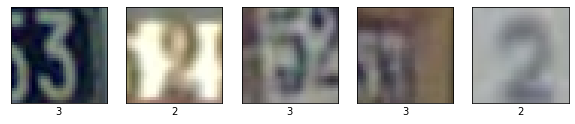

In [0]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """
    Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

## Copied from https://canvas.tue.nl/courses/10319/discussion_topics/79847
def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    # if a json description is available, load config and then weights
    if os.path.isfile(os.path.join(base_dir, name+'.json')):
      json_file = open(os.path.join(base_dir, name+'.json'), 'r')
      loaded_model_json = json_file.read()
      json_file.close()
      model = model_from_json(loaded_model_json)
      model.load_weights(os.path.join(base_dir, name+extension))
    # else just load the entire model from hdf5 file
    else:
      model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

# def load_model_from_file(base_dir, name, extension='.h5'):
#     """
#     Loads a model from a file. The returned model must have a 'fit' and 'summary'
#     function following the Keras API. Don't change if you use TensorFlow. 
#     Otherwise, adapt as needed. 

#     Keyword arguments:
#     base_dir -- Directory where the models are stored
#     name -- Name of the model, e.g. 'question_1_1'
#     extension -- the file extension
#     """
#     try:
#         model = load_model(os.path.join(base_dir, name+extension))
#     except OSError:
#         shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
#         return False
#     return model

## Copied from https://canvas.tue.nl/courses/10319/discussion_topics/79847
def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  path = os.path.join(base_dir, name+extension)
  model.save(path)
  size = os.path.getsize(path)
  # If model > 100MB, store the weights and architecture only.
  if size > 100*1024*1024:
    print("Model larger than 100MB, storing weights only.")
    model.save_weights(path)
    model_json = model.to_json()
    with open(os.path.join(base_dir, name+".json"), "w") as json_file:
        json_file.write(model_json)

# def save_model_to_file(model, base_dir, name, extension='.h5'):
#     """
#     Saves a model to file. Don't change if you use TensorFlow. 
#     Otherwise, adapt as needed. 

#     Keyword arguments:
#     model -- the model to be saved
#     base_dir -- Directory where the models should be stored
#     name -- Name of the model, e.g. 'question_1_1'
#     extension -- the file extension
#     """
#     model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """
    Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

In [0]:
# # Toy usage example
# # Remove before submission
# from tensorflow.keras import models
# from tensorflow.keras import layers 

# def build_toy_model():
#     model = models.Sequential()
#     model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
#     model.add(layers.Dense(10, activation='relu'))
#     model.add(layers.Dense(10, activation='softmax'))
#     model.compile(optimizer='rmsprop',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # First build and store
# run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
#                train=True, epochs=3, batch_size=32)

In [0]:
# # Toy usage example
# # Remove before submission
# # With train=False: load from file and report the same results without rerunning
# run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
#                train=False)

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_28 (Reshape)         (None, 3072)              0         
_________________________________________________________________
dense_158 (Dense)            (None, 1000)              3073000   
_________________________________________________________________
dense_159 (Dense)            (None, 100)               100100    
_________________________________________________________________
dense_160 (Dense)            (None, 10)                1010      
Total params: 3,174,110
Trainable params: 3,174,110
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.923392  0.183463  0.873960      0.179014
max  2.262742  0.717078  2.182251      0.738088
Answer is 454 characters long


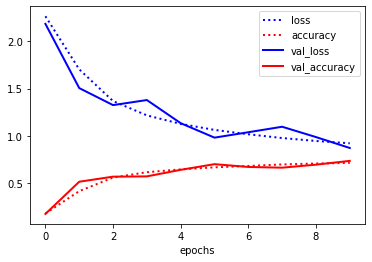

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model_1_1():
  """
  Builds a TF model consisting of 3 dense layers in a pyramid shape.
  Layer 3 has 10 nodes, for 10 classes, and each earlier layer as 10* that amount.
  The last layer uses a sigmoid activation, whereas the others use relu.
  """
  network = models.Sequential()
  network.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  network.add(layers.Dense(1000, activation='relu'))
  network.add(layers.Dense(100,  activation='relu'))
  network.add(layers.Dense(10,   activation='sigmoid'))
  
  network.compile(
      optimizer='rmsprop',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  
  # Return model
  return network

# Run the evalution thing
use_epochs = 15           # Default = 3
use_batch_size = 64       # Default = 32

run_evaluation(
    "model_1_1", build_model_1_1, evaluation_split, base_dir, 
    train=False, epochs=use_epochs, batch_size=use_batch_size
)

# Description of design;
answer_q_1_1 = """
The design is based on Occams's Razor; the simplest model in context of the
exercise uses 3 dense layers, with 40, 20, and 10 neurons. 
After experimentation, I settled on a 10-based scale: 1000, 100, and 10 neurons.
The last layer uses a simple sigmoid function, and the others use the 
well-known relu. After 12 epochs, it achieves 70%+ accuracy.
Increasing the batch_size from 32 to 64 results in faster training times,
and 70%+ accuracy at epoch 8.
"""

print(f"Answer is {len(answer_q_1_1)} characters long")

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Loading model from file
Success!
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_32 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_170 (Dense)            (None, 1000)              1025000   
_________________________________________________________________
dense_171 (Dense)            (None, 100)               100100    
_________________________________________________________________
dense_172 (Dense)            (None, 10)                1010      
Total params: 1,126,110
Trainable params: 1,126,110
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.753251  0.259112  0.781528      0.359728
max  2.072828  0.769215  1.795314      0.767986
Answer is 231 characters long


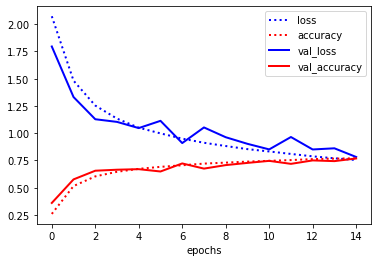

In [0]:
# Only apply RGB -> Greyscale conversion.
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
  """
  See build_model_1_1(). Only change is reshape layer.
  """
  network = models.Sequential()
  ## Only change! Have to reshape differently due to different dimensions.
  network.add(layers.Reshape((1024,), input_shape=(32,32,1))) 
  network.add(layers.Dense(1000, activation='relu'))
  network.add(layers.Dense(100,  activation='relu'))
  network.add(layers.Dense(10,   activation='sigmoid'))
  
  network.compile(
      optimizer='rmsprop',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  
  # Return model
  return network

# Run the evalution thing
use_epochs = 15           # Default = 3
use_batch_size = 64       # Default = 32

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation(
    "model_1_2", build_model_1_2, preprocessed_split, base_dir, 
    train=False, epochs=use_epochs, batch_size=use_batch_size
)

answer_q_1_2 = """
Changing only preprocessing (the rest of the model is the same, as well as epochs
and batch_size) shows that the model now converges around 15 epochs. Its maximum
accuracy (on both train and test sets) is also marginally larger. 
"""

print(f"Answer is {len(answer_q_1_2)} characters long")

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Using TensorFlow backend.


Loading model from file
Success!
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_54 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_233 (Dense)            (None, 1000)              1025000   
_________________________________________________________________
dense_234 (Dense)            (None, 100)               100100    
_________________________________________________________________
dense_235 (Dense)            (None, 10)                1010      
Total params: 1,126,110
Trainable params: 1,126,110
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.692913  0.264620  0.759950      0.357588
max  2.055659  0.794001  1.798699      0.779191
Answer is 487 characters long


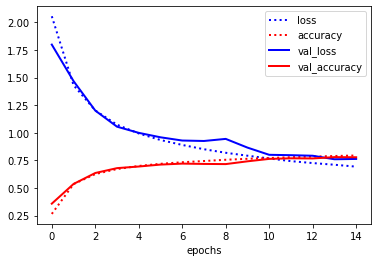

In [0]:
from keras import regularizers
from keras import optimizers

def build_model_1_3():
  """
  See build_model_1_1()
  """
  network = models.Sequential()
  network.add(layers.Reshape((1024,), input_shape=(32,32,1))) 
  network.add(layers.Dense(1000, activation='relu',    bias_regularizer=regularizers.l2(0.001)))
  network.add(layers.Dense(100,  activation='relu',    bias_regularizer=regularizers.l2(0.001)))
  network.add(layers.Dense(10,   activation='sigmoid', bias_regularizer=regularizers.l2(0.001)))
  
  network.compile(
      # Change to include learning rate
      optimizer='nadam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  
  # Return model
  return network

# Run the evalution thing
use_epochs = 15            # Default = 3
use_batch_size = 128       # Default = 32

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation(
    "model_1_3", build_model_1_3, preprocessed_split, base_dir, 
    train=False, epochs=use_epochs, batch_size=use_batch_size
)

answer_q_1_3 = """
Regularizer choice: Only applying bias regularizer improves results ever so slightly, kernel_regularizer and activity_regularizer stop at 0.1910 accuracy.
Experimentation shows l2 regularisation with 0.001 gives best results. Changing the optimiser to nadam improves results slightly too. 
Finally, changing batch size from 64 to 128 gives better computation time per epoch, and slightly better train and test accuracy.
We almost achive 80% accuracy with this (dumb) dense layer model.
"""

print(f"Answer is {len(answer_q_1_3)} characters long")

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (Max

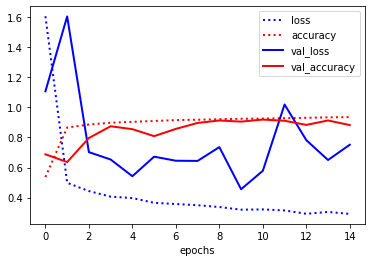

In [0]:
from keras import initializers

def build_model_2_1():
  """
  Builds the model according to https://www.openml.org/r/9204254,
  which was the best available run on OpenML for this dataset.
  It is based on conv2d layers, so I reimplemented it.

  Contains a total of 19 layers.
  """
  the_initialiser_used = initializers.VarianceScaling(scale = 1.0, mode = 'fan_avg', distribution = 'uniform')

  network = models.Sequential()
  ## Layer 0; Reshaping
  ## network.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  
  # Layer 1; Conv2D layer
  network.add(layers.Conv2D(input_shape = (32, 32, 1),filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = the_initialiser_used))
  # Layer 2; Conv2D layer
  network.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = the_initialiser_used))
  # Layer 3; MaxPooling
  network.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2),padding='valid'))
  # Layer 4; BatchNormalization (default)
  network.add(layers.BatchNormalization())
  # Layer 5; Conv2D layer
  network.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = the_initialiser_used))
  # Layer 6; Conv2D layer
  network.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = the_initialiser_used))
  # Layer 7; MaxPooling
  network.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2),padding='valid'))
  # Layer 8; BatchNormalization (default)
  network.add(layers.BatchNormalization())
  # Layer 9; Conv2D layer
  network.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = the_initialiser_used))
  # Layer 10; Conv2D layer
  network.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = the_initialiser_used))
  # Layer 11; Conv2D layer
  network.add(layers.Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', kernel_initializer = the_initialiser_used))
  # Layer 12; MaxPooling
  network.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2, 2),padding='valid'))
  # Layer 13; BatchNormalization (default)
  network.add(layers.BatchNormalization())
  # Layer 14; Flatten
  network.add(layers.Flatten())
  # Layer 15; Dense, relu
  network.add(layers.Dense(units = 4096,activation = 'relu',kernel_initializer = the_initialiser_used))
  # Layer 16; Dropout
  network.add(layers.Dropout(rate = 0.5))
  # Layer 17; Dense, relu
  network.add(layers.Dense(units = 4096,activation = 'relu',kernel_initializer = the_initialiser_used))
  # Layer 18; Dropout
  network.add(layers.Dropout(rate = 0.5))
  # Layer 19; Dense, softmax
  network.add(layers.Dense(units = 10,activation = 'softmax',kernel_initializer = the_initialiser_used))

  network.compile(
      optimizer='rmsprop',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  
  # Return model
  return network

# Run the evalution thing
use_epochs = 15             # Default = 3
use_batch_size = 128        # Default = 32

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation(
    "model_2_1", build_model_2_1, preprocessed_split, base_dir, 
    train=False, epochs=use_epochs, batch_size=use_batch_size
)


answer_q_2_1 = """
My design choices follow the convolutional network on OpenML that achieves the best accuracy.
I simply took one and recoded it into tensorflow. The corresponding model is linked in the docstring.
Over merely 15 epochs, it reaches 0.935494 and 0.918927 maximum accuracy on the training and test sets, which is considerably better than 0.70 or 0.78.
"""

print(f"Answer is {len(answer_q_2_1)} characters long")

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [0]:
def augment_set(data, labels, augmentor):
  """
  Method to augment a single np array of images according to some augmentor (ImageDataGenerator).
  NOT in place as to avoid overwriting original images accidentally.
  """
  # Create a copy
  my_data = np.copy(data)
  my_labels = np.copy(labels)
  amt = len(my_data)

  # Loop through each augmented image, and set current image to it
  current = 0
  for batch, new_label in augmentor.flow(my_data, labels, batch_size=1):
    my_data[current] = batch[0]
    my_labels[current] = new_label[0]
    current += 1
    if current >= amt:
      break
  
  # Return the augmented collection
  return (my_data, my_labels)

def augmentor_representation(augmentor):
  """
  Gives a simple representation for testing.
  """
  default_gen = ImageDataGenerator()
  s = "augmentor("
  for (a_k, a_v), (b_k, b_v) in zip(augmentor.__dict__.items(), default_gen.__dict__.items()):
    if a_k == b_k:
      if a_v != b_v:
        s = s + str(a_k) + ': ' + str(a_v) + ","
  s += ")"
  return s

augmentor(rotation_range: 20,shear_range: 0.2,)
Loading model from file
Success!
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 128)       147584    
_______________________________________

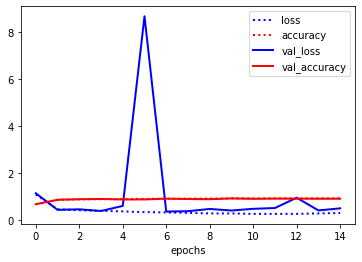

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
augmented_split = preprocessed_split

# Convert to list for item assignment below
augmented_split = list(augmented_split)

# Rotation and shear
rot_and_shear = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2
)
rot_and_shear.fit(augmented_split[0])

# Compute some augmented things
new_X_train, new_y_label = augment_set(augmented_split[0], augmented_split[2], rot_and_shear)

# Add them to the original dataset
augmented_split[0] = np.concatenate((augmented_split[0], new_X_train))
augmented_split[2] = np.concatenate((augmented_split[2], new_y_label))

# Note: We effectively doubled the training set in size.

# Convert back to tuple to avoid random errors?
augmented_split = tuple(augmented_split)

# Run the evalution thing
use_epochs = 15             # Default = 3
use_batch_size = 128        # Default = 32

print(augmentor_representation(rot_and_shear))

run_evaluation(
    "model_2_2", build_model_2_1, augmented_split, base_dir, 
    train=False, epochs=use_epochs, batch_size=use_batch_size
)

 

answer_q_2_2 = """
Design choices: After some experimentation with keras' ImageDataGenerator and many plots,
using an ImageDataGenerator(rotation_range = 20, shear_range = 0.2) already gives nice variation.
Training the model on the augmented split (that has 2x the amt of training data)
shows over 90% validation accuracy after epoch 4. After 7 epochs it tops the non-augmented version, 
and after 15 epochs it gives a maximum accuracy of 0.938011 on the train set and 0.932398 on the test set.
"""

print(f"Answer is {len(answer_q_2_2)} characters long")

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in `test_accuracy_3_1`.
* Plot the confusion matrix in `plot_confusion_matrix` and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number `2`) and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in `plot_misclassifications`.
* Summarize your findings in `answer_q_3_1`.

In [0]:
def cont_multi_output_to_multilabel_indicator(CMO):
  y_hat = np.zeros_like(CMO)
  y_hat[np.arange(len(CMO)), CMO.argmax(1)] = 1
  return y_hat

def multilabel_indicator_to_multiclass(MIL):
  y_hat = (np.argmax(MIL, axis=1) + 1.0) % 10
  return y_hat


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


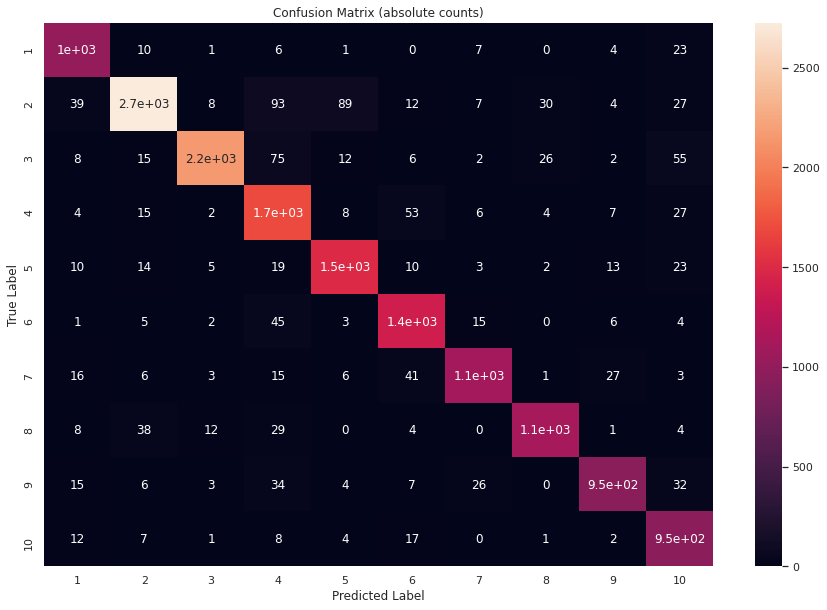

Misclassified per row: [ 52 309 201 126  99  81 118  96 127  52]
Misclassified per col: [113 116  37 324 127 150  66  64  66 198]
Answer is 312 characters long


In [0]:
# from sklearn.utils.multiclass import type_of_target
# There were some issues with type of target due to non-ohe output
import sklearn.metrics as metrics
import seaborn as sns
import pandas as pd

# Load the model and learning curves
model_to_load = 'model_2_2'
model = load_model_from_file(base_dir, model_to_load)

learning_curves = pickle.load(open(os.path.join(base_dir, model_to_load+'.p'), "rb"))
lc = pd.DataFrame(learning_curves)

test_accuracy_3_1 = max(lc['val_accuracy'])

def plot_confusion_matrix():
  # True labels as multiclass
  y_true_labels = multilabel_indicator_to_multiclass(y_val)
  
  # Predicted labels as continuous-multioutput
  y_hat_labels = model.predict(preprocessed_split[1])  # shape=(15887, 10)

  # Predicted labels as multilabel-indicator
  y_hat_labels = cont_multi_output_to_multilabel_indicator(y_hat_labels)

  # Predicted labels as multiclass
  y_hat_labels = multilabel_indicator_to_multiclass(y_hat_labels)

  # Give confusion matrix from scikitlearn
  cm_counts = metrics.confusion_matrix(
      y_true=y_true_labels, 
      y_pred=y_hat_labels,
      # normalize='all'
  )  # shape=(10, 10)
  df_cm = pd.DataFrame(cm_counts, range(1, 11), range(1, 11))
  plt.figure(figsize=(15,10))
  sns.set(font_scale=1.0)
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 12})
  plt.title("Confusion Matrix (absolute counts)")
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.show()
  return cm_counts

# Save to get some counts
cm = plot_confusion_matrix()
for i in range(len(cm)):
  cm[i][i] = 0 
print(f"Misclassified per row: {np.sum(cm, axis=1)}")
print(f"Misclassified per col: {np.sum(cm, axis=0)}")

# Misclassified per row: [ 52 309 201 126  99  81 118  96 127  52]
# Misclassified per col: [113 116  37 324 127 150  66  64  66 198]

# Todo
def plot_misclassifications():
  pass

answer_q_3_1 = """
The two most erroneous classes are 4 and 2.
For 4, most issues (72% of misclassifications) occur when the predicted label is 4.
For 2, most issues (73% of misclassifications) occur when the true label is 2.
It doesn't come as surprise that the most misclassifcations thus occur when true = 2 and predicted = 4.
"""
print(f"Answer is {len(answer_q_3_1)} characters long")

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

Total conv layers: 7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


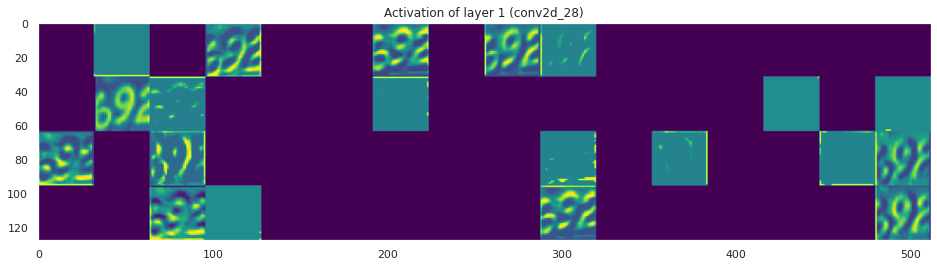

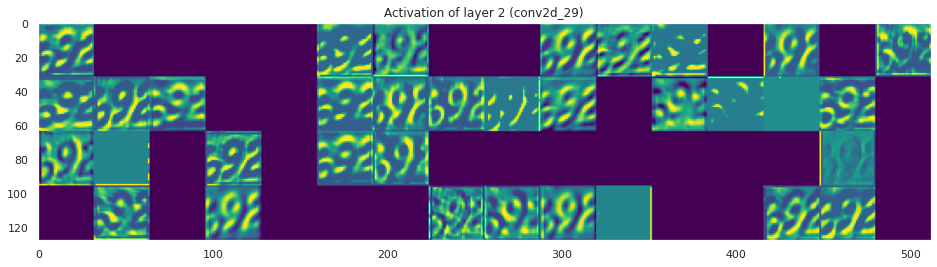

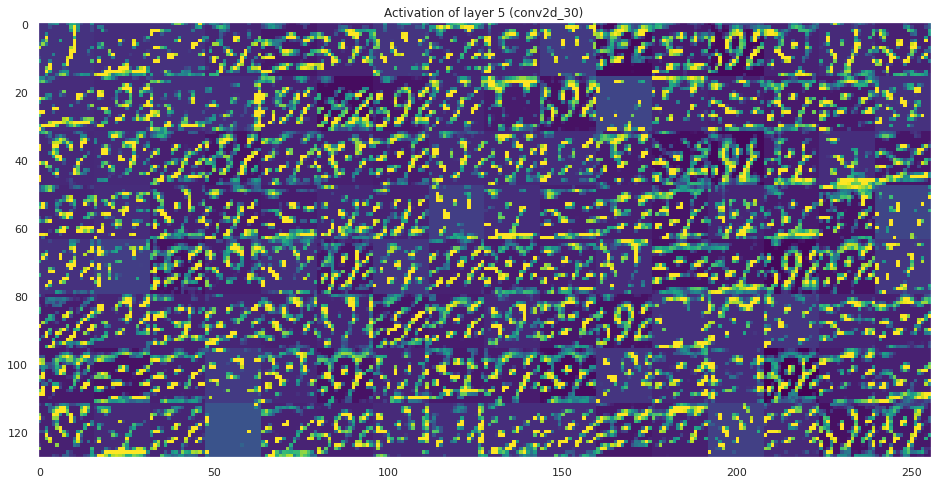

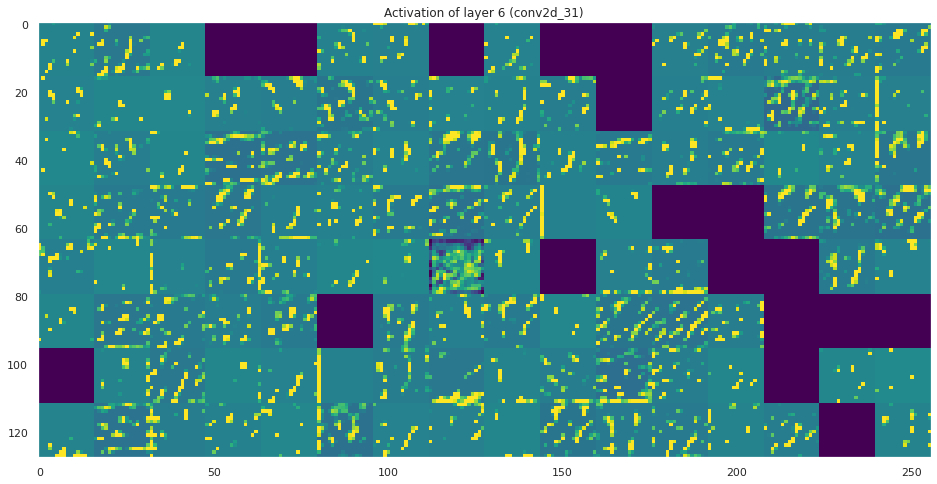

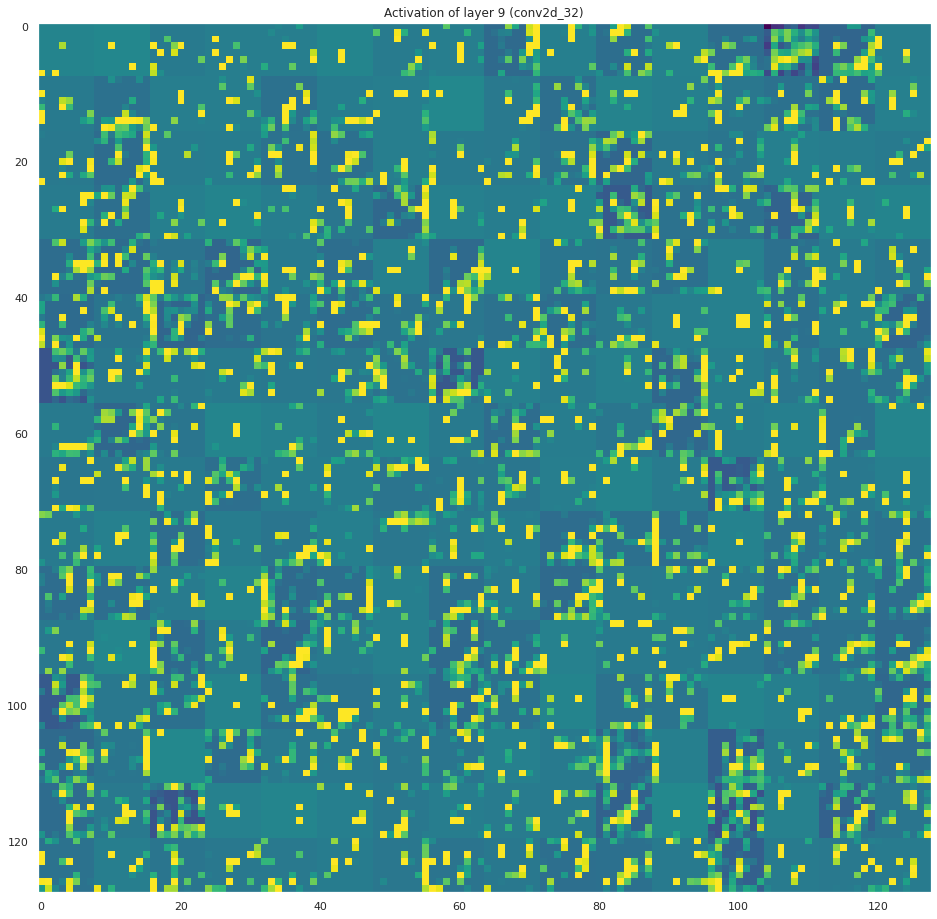

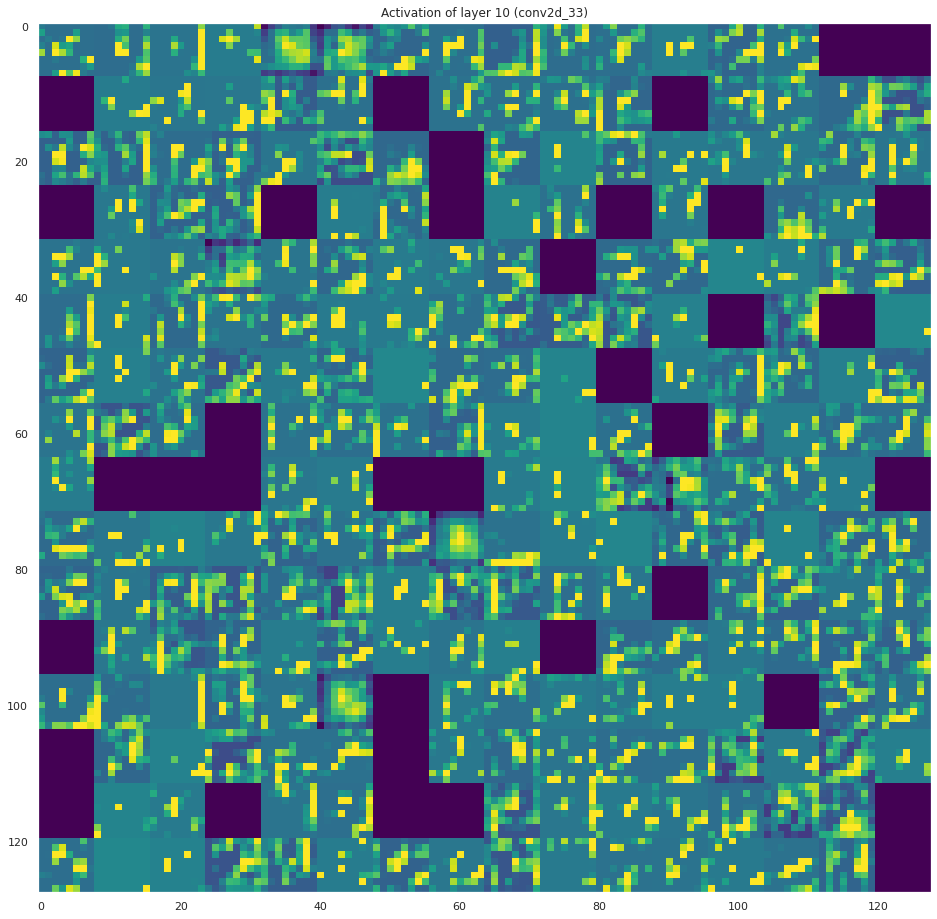

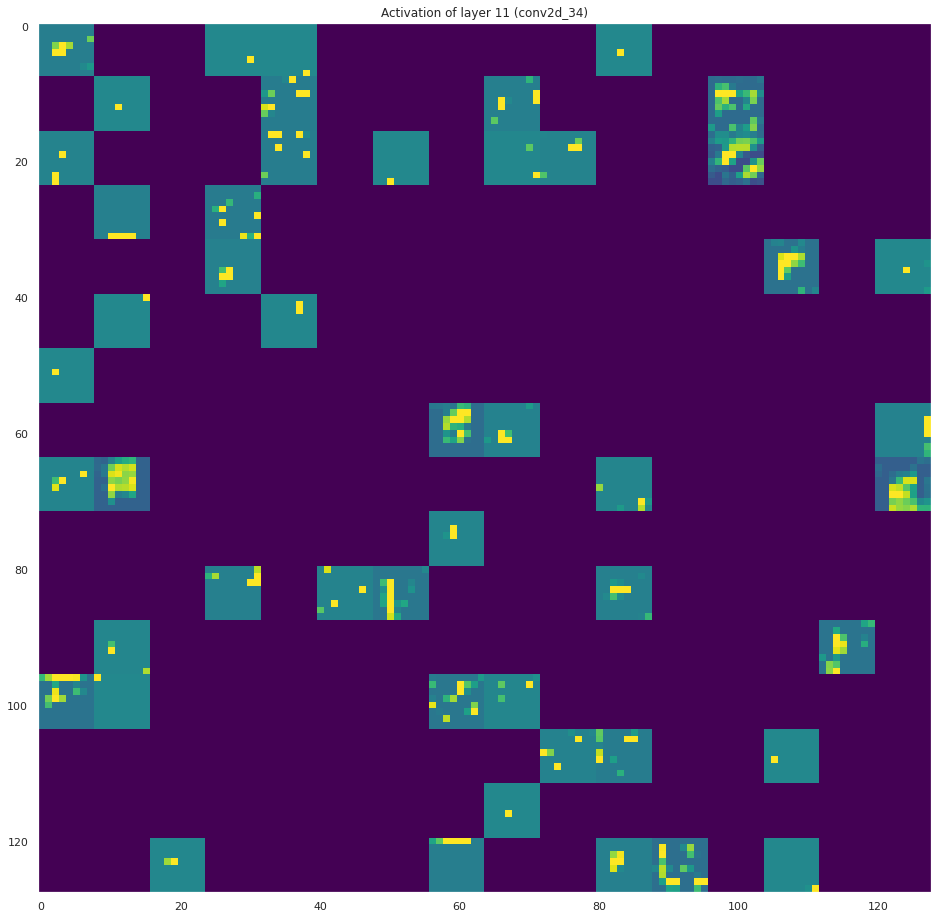

Answer is 590 characters long


In [0]:
from tensorflow.keras import layers

def plot_activations():
  # Load the model and learning curves
  model_to_load = 'model_2_2'
  model = load_model_from_file(base_dir, model_to_load)

  learning_curves = pickle.load(open(os.path.join(base_dir, model_to_load+'.p'), "rb"))
  lc = pd.DataFrame(learning_curves)

  # Extracts the outputs of all layers
  layer_outputs = [
    layer.output
    for layer in model.layers
    if type(layer) is type(layers.Conv2D(0,0))
  ]

  layer_names = [
    layer.name
    for layer in model.layers
    if type(layer) is type(layers.Conv2D(0,0))
  ]

  layer_indices = [
    model.layers.index(layer)
    for layer in model.layers
    if type(layer) is type(layers.Conv2D(0,0))
  ]

  # Creates a model that will return these outputs, given the model input:
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

  img_tensor = preprocessed_split[1][0] # X_val, preprocessed
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_label = preprocessed_split[3][0] 
  activations = activation_model.predict(img_tensor)
  print(f"Total conv layers: {len(activations)}")

  images_per_row = 16

  for (layer_name, layer_activation, layer_index) in zip(layer_names, activations, layer_indices):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(f"Activation of layer {layer_index + 1} ({layer_name})")
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

  plt.show()
plot_activations()


answer_q_3_2 = """
The first two convlayers mostly show the boundaries of the digits or edges of the
entire 32x32 area. Layer 5 contain more filters, and essentially shows the same things,
but in lower resolution due to the maxpooling+batch normalisation combo. Layer 6 abstracts away further.
It seems like it selects parts of the filters of the previous layer.
In Layers 9, 10, and 11, we can see the same effect in increasing fashion: Many filters essentially are just small 
little blobs that are seemingly random due to the amount of abstraction, combined with the maxpooling+batch normalisation combo.
"""
print(f"Answer is {len(answer_q_3_2)} characters long")

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpose the activation map over the image. If not, plot
them side by side. Implement a function `plot_3_3` that returns the entire plot.

In [0]:
from tensorflow.keras import backend as K
from google.colab.patches import cv2_imshow 

def plot_activation_map():
  """
  Plots activation map. Saves to temp image for superimposing.
  Copy-pasted from 06 - CNN notebook.
  """
  model = load_model_from_file(base_dir, 'model_2_2')
  print(model.output[:, :])
  output=model.output
  # The is the output feature map of the `conv2d_34 ` layer,
  # the last convolutional layer in model_2_2
  

  # This is the gradient of the "african elephant" class with regard to
  # the output feature map of `block5_conv3`
  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer(name='conv2d_34')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    # x = the image that I want to look at.
    # I can't figure out how to get this working ;(
    """
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  plt.matshow(heatmap)
  plt.show()
  """

def plot_3_3():
  pass

plot_activation_map()

Tensor("strided_slice_18:0", shape=(None, 10), dtype=float32)


## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Training the model
Epoch 1/15
497/497 [==============================] - 65s 131ms/step - loss: 1.6081 - accuracy: 0.4389 - val_loss: 1.4865 - val_accuracy: 0.4812
Epoch 2/15
497/497 [==============================] - 64s 128ms/step - loss: 1.3727 - accuracy: 0.5240 - val_loss: 1.4064 - val_accuracy: 0.5017
Epoch 3/15
497/497 [==============================] - 63s 127ms/step - loss: 1.2833 - accuracy: 0.5560 - val_loss: 1.3905 - val_accuracy: 0.5229
Epoch 4/15
497/497 [==============================] - 63s 127ms/step - loss: 1.2219 - accuracy: 0.5756 - val_loss: 1.2943 - val_accuracy: 0.5562
Epoch 5/15
497/497 [==============================] - 64s 128ms/step - loss: 1.1739 - accuracy: 0.5944 - val_loss: 1.2644 - val_accuracy: 0.5649
Epoch 6/15
497/497 [==============================] - 65s 130ms/step - loss: 1.1301 - accuracy: 0.6103 - val_loss: 1.2360 - val_accuracy: 0.5779
Epoch 7/15
497/497 [==============================] - 64s 129ms/step - loss: 1.0967 - accuracy: 0.6207 - val_lo

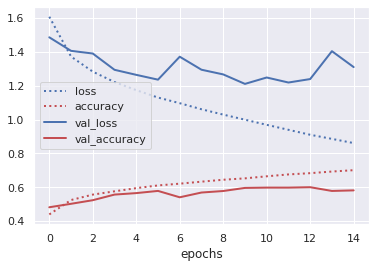

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import backend as K

def build_model_4_1():
  # import model without top, set input shape to our image shape
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
  # Freeze layers
  base_model.trainable = False
  model = models.Sequential()
  model.add(base_model)
  model.add(layers.Flatten())
  model.add(layers.Dense(1000, activation = 'relu'))
  model.add(layers.Dense(100, activation = 'relu'))
  model.add(layers.Dense(10, activation = 'sigmoid'))

  model.compile(
      optimizer='rmsprop',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

# Run the evalution thing
use_epochs = 15            # Default = 3
use_batch_size = 128       # Default = 32

run_evaluation( # replaced pre_processed split with evaluation split as we should train on the original colored training data according to the question.
    "model_4_1", build_model_4_1, evaluation_split, base_dir, 
    train=True, epochs=use_epochs, batch_size=use_batch_size
)

# Description of design;
answer_q_4_1 = """
After 15 epochs, the model is still not done training, even though it contains 
an identical batch size to the one in q_2_2. Clearly: preprocessing and dropout layers help the model quite much.
"""

print(f"Answer is {len(answer_q_4_1)} characters long")

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [0]:
# Skipped due to not enough time. Sorry!
import pickle
import gzip

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """
  Stores all necessary embeddings to file
  """
  pass

def generate_pipeline():
  """
  Returns an sklearn pipeline.
  """
  pass

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """
  Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pass

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """
  Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  pass

answer_q_4_2 = """
Your answer 
"""
print("Pipeline:", generate_pipeline())
print(f"Answer is {len(answer_q_4_2)} characters long")

Pipeline: None
Answer is 44 characters long
